In [2]:
from IPython.display import HTML, Image

# Agenda

* Explore vs. Explain
* How should we represent high dimensional data?
* Visual Encoding
* Choosing the correct chart type.
* Practice this Vocabulary with Examples

# Why Care?
* Often the way you interact with non-technical people who can give you raises.
* Allows you to show _lots_ of data.
* People love this stuff.



# Exploratory vs. Explanatory

* Exploratory:
 * Understanding data without any expected agenda or narrative.
* Explanatory:
 * Using data-viz to editorialize and communicate a narrative
 * Can be author-driven or viewer-driven.


# High dimensional data

* Two is easy
* How to get more?

# Visual Encoding of Information

## Types of data:
* Nominal - non-numeric categories (e.g. Brand)
* Ordinal - numeric data with non-constant or unknown spacing (e.g. scale of 1-10). 
* Interval - numeric data with uniform spacing (e.g. degrees celcius, SAT scores, interest rates)
* Ratio - interval data with a natural zero (e.g. degrees kelvin, percent of successes)

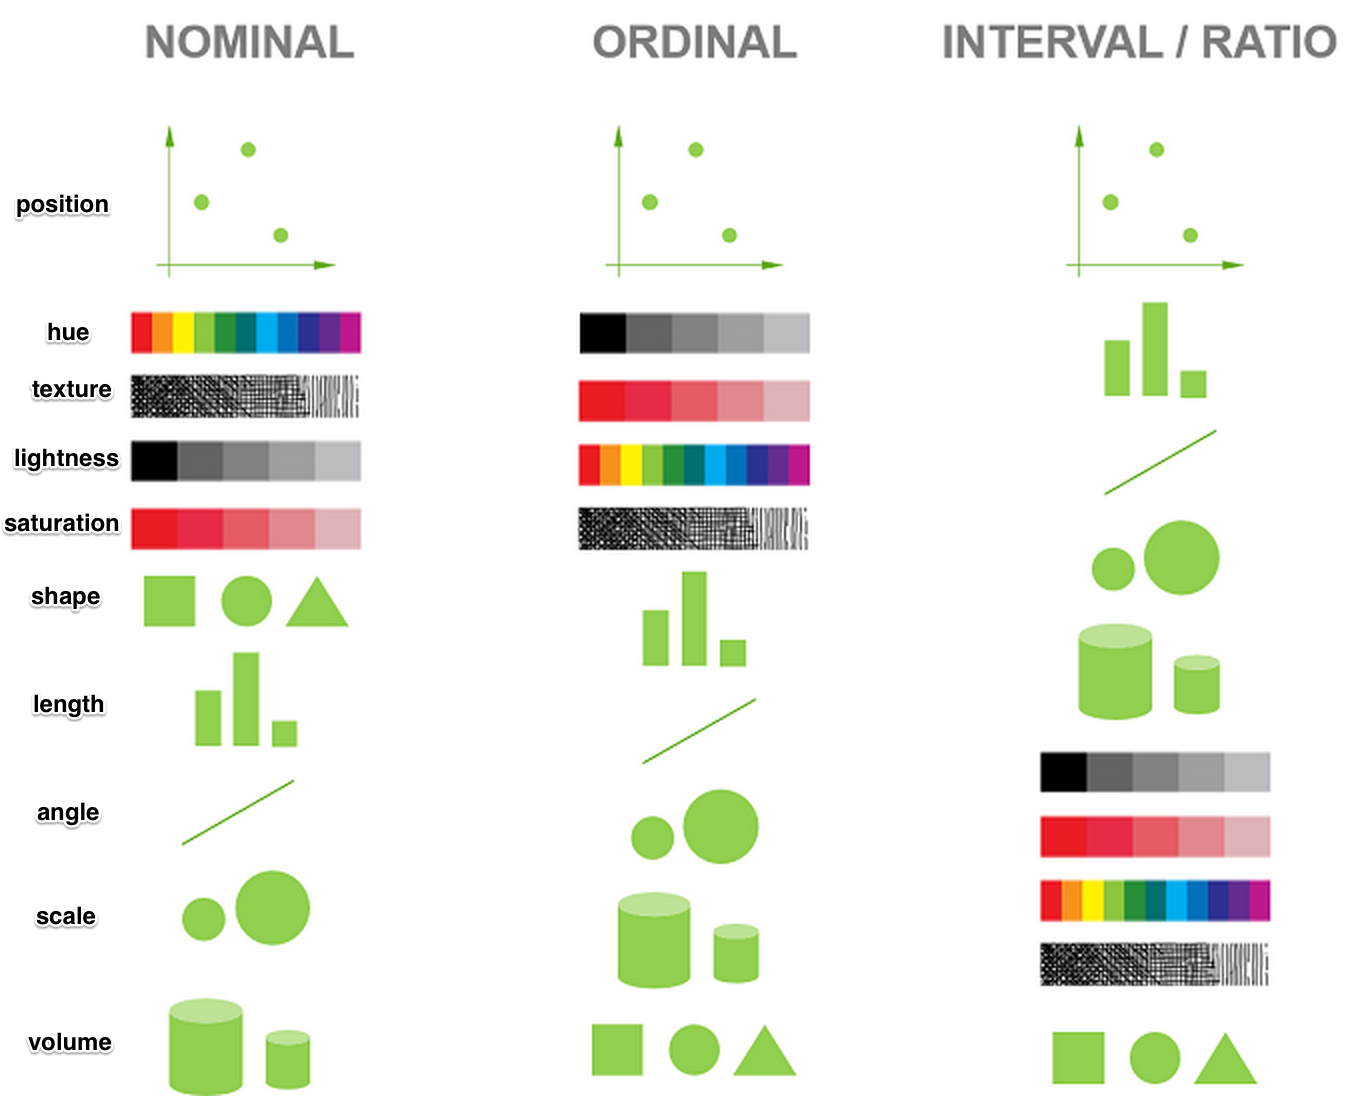

In [3]:
Image('images/visual_encodings.png', width=600)

# About color:


## Jet color map.
Y'know, this one:
![Jet Color Gradient](http://www.met.reading.ac.uk/~ed/bloguploads/rainbow.png)

 * Creates false boundaries between colors
 * Not well attunded to the human perception of colors, i.e., when people look at difference in this scale, they don't correctly perceive the differences in the encoded data.
 
 ### Volume of Obama and Romney tweets from the 2012 election
 ![Bad Jet](http://www.poynter.org/wp-content/uploads/2013/09/L5_Figure12.jpg)
 ![Better than Jet](http://www.poynter.org/wp-content/uploads/2013/09/L5_Figure13.jpg)
 
 ### Elevation
 ![Jet](http://www.research.ibm.com/people/l/lloydt/color/figure1.jpg)
 
 ### Many examples
 ![Jet vs. Perceptual](http://www.research.ibm.com/people/l/lloydt/color/figure6.jpg)


# What makes good color choices?

## Respect colorblindness
A common condition that should affect your use of colors in data visualization.
 * Affects about 1/12 men and 1/200 women. ~4.5% of total population
 * Inability to distinguish red/green, or blue/green are most common.
 * Good choices are blue-yellow gradients, or 
 
## Accurately Recreates Data e.g. Perceptually uniform
The difference in perceived intensity of the color in the eye should match the difference in intensity of the data at all parts of the spectrum.
 * The new matplotlib color default "viridis" is chosen with exactly this criteria in mind.
 
## Prints in black and white
e.g. perceptually uniform for lightness. Matplotlib has considered this too.

## Or maybe, you want to show something else:
![Other choices](http://www.research.ibm.com/people/l/lloydt/color/figure8.jpg)

# High Dimensional Data

Seems like we're stuck, but:

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/isaac/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


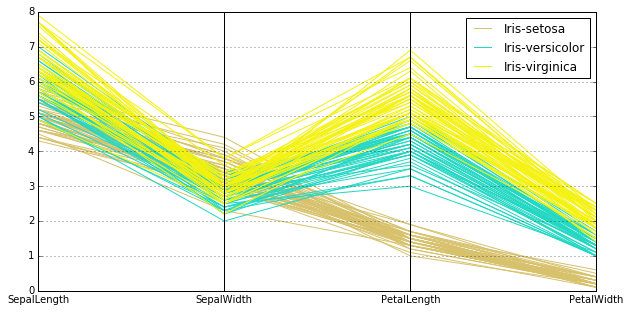

In [2]:
from pandas.tools.plotting import parallel_coordinates

data = pd.read_csv('data/iris.csv')
plt.figure(figsize=(10, 5))
parallel_coordinates(data, 'Name')

## (Finally) An Acceptable use of PCA

* Remember that PCA seeks to maxize the variance of each component.
* Given this would you expect PCA to capture global or local structure?


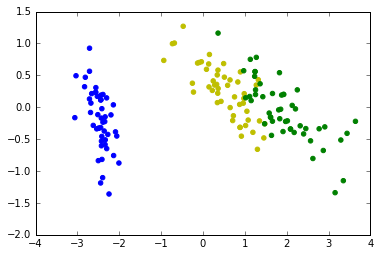

In [3]:
from sklearn.decomposition import PCA
def plot_reduced_scatter(ax, reduction):
    pca = reduction.fit_transform(data.iloc[:,0:3])
    colors = data.iloc[:,4]
    colors = colors.replace(dict(zip(colors.unique(), 
                                     ['b', 'y', 'g'])))
    ax.scatter(pca[:,0], pca[:,1], color=colors)
fig = plt.figure()
ax = fig.add_subplot(111)
plot_reduced_scatter(ax, PCA())

# T-SNE: the cutting edge

* Works best with high-d data.
* Tries to come up with low-D representation that preserves local structure observed in hi-D
* Preserves local structure, whereas PCA preserves global structure.

[In-depth video explanation](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjV9d-Mv6_MAhVT22MKHbCYDA8QtwIIHDAA&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DRJVL80Gg3lA&usg=AFQjCNEDXRJcLcyT4uRh9O1JAL45-yBOUg&bvm=bv.120853415,d.cGc)

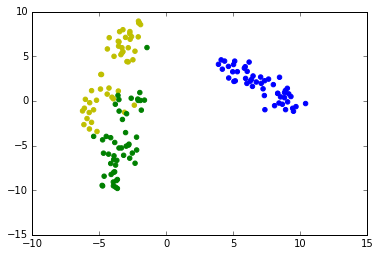

In [4]:
from sklearn.manifold import TSNE
fig = plt.figure()
ax = fig.add_subplot(111)
t_sne = TSNE(perplexity=25, learning_rate=100, n_iter=100000)
plot_reduced_scatter(ax, t_sne)

In [5]:
def show_block(src, width=900, height=800):
    block = "<iframe src='%s' width=%i height=%i></iframe>" % (src, width, height)
    return HTML(block)

(http://www.comm-dev.org/media/jw_sigpro/users/0000000951/Jan%202016%20Data%20viz/job-viz.png)
http://www.nytimes.com/interactive/2012/05/17/business/dealbook/how-the-facebook-offering-compares.html
http://visualizations.manassra.com/syria
http://sanfrancisco.crimespotting.org/#zoom=13&lon=-122.438&types=AA,Mu,Ro,SA,DP,Na,Al,Pr,Th,VT,Va,Bu,Ar&lat=37.760&hours=0-23&dtend=2014-02-28T23:59:59-07:00&dtstart=2014-02-21T23:59:59-07:00
http://mbtaviz.github.io/
http://guns.periscopic.com/
http://static5.businessinsider.com/image/4ed3b3576bb3f7c03100002a/usa-traffic-fatalities.jpg

In [ ]:
show_block('http://www.comm-dev.org/media/jw_sigpro/users/0000000951/Jan%202016%20Data%20viz/job-viz.png')

In [ ]:
show_block("http://www.nytimes.com/interactive/2012/05/17/business/dealbook/how-the-facebook-offering-compares.html")

In [ ]:
show_block('http://visualizations.manassra.com/syria')

In [ ]:
show_block('http://sanfrancisco.crimespotting.org/#zoom=13&lon=-122.438&types=AA,Mu,Ro,SA,DP,Na,Al,Pr,Th,VT,Va,Bu,Ar&lat=37.760&hours=0-23&dtend=2014-02-28T23:59:59-07:00&dtstart=2014-02-21T23:59:59-07:00')

In [ ]:
show_block('http://mbtaviz.github.io/')

In [ ]:
show_block('http://guns.periscopic.com/')

# Spatial Data Visualization

## Chloropleth

The classic red/blue map doesn't do a good job of communicating the actual balance of support for political parties in the US.

In [ ]:
show_block('https://en.wikipedia.org/wiki/Red_states_and_blue_states#/media/File:Map_of_USA_by_state_upperhouse.svg')

Showing traffic fatalities without normalizing by amount of traffic, just tells us where people drive.

In [ ]:
Image('http://static5.businessinsider.com/image/4ed3b3576bb3f7c03100002a/usa-traffic-fatalities.jpg')

Do we think that the map below is showing us an area where catholicism is more popular?

In [10]:
Image('images/chloropleth.png', width=800)